In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
variable_names = [ "Trial"," Stimulus 1 value", "Stimulus 1 std", "Stimulus 2 value", "Stimulus 2 std"]
print(variable_names)

['Trial', ' Stimulus 1 value', 'Stimulus 1 std', 'Stimulus 2 value', 'Stimulus 2 std']


####################### visualisation des données #####################

In [ ]:
from csv_maker_jerome import generate_data_CDF
generate_data_CDF()

In [3]:
results = pd.read_csv('experiment_results.csv')
#print(results.describe())
print(results)

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results.csv'

In [ ]:
trials = pd.read_csv('experiment_stim_pairs.csv')
print(trials)

     Trial   Stimulus 1 value  Stimulus 1 std  Stimulus 2 value  \
0        1                  3               0              -1.0   
1        2                  3               0              -1.0   
2        3                  3               0              -1.0   
3        4                  3               0              -1.0   
4        5                  3               0              -1.0   
..     ...                ...             ...               ...   
195    120                  3               0               1.0   
196    140                  3               0               1.0   
197    160                  3               0               1.0   
198    180                  3               0               1.0   
199    200                  3               0               1.0   

     Stimulus 2 std  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
195               0  
196               0

############################################

In [ ]:
## fonction pour creer les trials   #########################################
import csv
new_file_name = 'new_experiment_stim_pairs.csv'
with open(new_file_name, mode='w') as f:
    writer = csv.writer(f)
    writer.writerow(variable_names)
    for i in range(len(trials)):
        writer.writerow(())

In [ ]:
## fonction pour creer les trials   #########################################
stimulus_1_std = 0
stimulus_2_std = 0
stimulus_1_mean = 3
stimulus_2_mean = np.linspace(-1, 1, 20)
trial_number = 10
trial = 0 

import csv
new_file_name = 'new_experiment_stim_pairs.csv'
with open(new_file_name, mode='w') as f:
    writer = csv.writer(f)
    writer.writerow(variable_names)
    for d, s2_mean in enumerate(stimulus_2_mean):
        for tn in range(trial_number):
            trial +=1
 

In [ ]:

stimulus_1_std = 0
stimulus_2_std = 0
stimulus_1_mean = 3
stimulus_2_mean = np.linspace(-1, 1, 20)
trial_number = 100
trial = 0 

def create_stimulus_data(stimulus_2_std, file_name='new_experiment_stim_pairs.csv'):
    variable_names = ['trial', 'stimulus_1_mean', 'stimulus_1_std', 'stimulus_2_mean', 'stimulus_2_std']
    trial = 0  # Initialisation du compteur d'essais
    
    with open(file_name, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(variable_names)
        for d, s2_mean in enumerate(stimulus_2_mean):
            for tn in range(trial_number):
                trial += 1
                writer.writerow([trial, stimulus_1_mean, stimulus_1_std, s2_mean, stimulus_2_std])

In [ ]:
results = pd.read_csv('experiment_results.csv')
print(results)

     Trial  Stimulus 1 Value  Stimulus 1 Std  Stimulus 2 Value  \
0        1               0.0             0.0             -4.00   
1        2               0.0             0.0             -4.00   
2        3               0.0             0.0             -4.00   
3        4               0.0             0.0             -4.00   
4        5               0.0             0.0             -4.00   
..     ...               ...             ...               ...   
445     72               0.0             0.0             -2.25   
446     73               0.0             0.0             -2.25   
447     74               0.0             0.0             -2.25   
448     75               0.0             0.0             -2.25   
449     76               0.0             0.0             -2.25   

     Stimulus 2 Std  Comparison Result  
0               2.0               True  
1               2.0               True  
2               2.0               True  
3               2.0               True  
4 

In [ ]:
def get_prob_from_one_value_pair(results, std, mean):
    mean_results = results[results['Stimulus 1 Value'] == mean]
    std_results = mean_results[mean_results['Stimulus 1 Std'] == std]
    decision = std_results['Comparison Result']
        
    trial_count_with_same_std = len(std_results)  # Nombre d'essais avec le même std
    return np.sum(decision) / trial_count_with_same_std
    #return np.sum(decision)/trial_number

In [ ]:
means = results['Stimulus 1 Value'].unique()
stds = results['Stimulus 1 Std'].unique()
stimulus_2_mean = results['Stimulus 2 Value'].unique()
decision_prob = np.zeros((len(means), len(stds), len(stimulus_2_mean)))
for k, s2_mean in enumerate(stimulus_2_mean):
    for i, mean in enumerate(means):
        for j, std in enumerate(stds):
            decision_prob[i, j, k] = get_prob_from_one_value_pair(results[results['Stimulus 2 Value']==s2_mean], std, mean)
            print(mean,get_prob_from_one_value_pair(results[results['Stimulus 2 Value']==s2_mean], std, mean))

0.0 0.9545454545454546
0.0 1.0
0.0 0.9
0.0 1.0
0.0 0.9
0.0 0.9
0.0 0.9
0.0 0.75
0.0 0.7
0.0 0.8
0.0 0.8
0.0 0.7
0.0 0.7
0.0 0.8
0.0 0.6
0.0 0.6
0.0 0.7
0.0 0.3
0.0 0.5
0.0 0.5
0.0 0.3
0.0 0.2
0.0 0.1
0.0 0.1
0.0 0.1
0.0 0.1
0.0 0.2
0.0 0.2
0.0 0.0
0.0 0.0
0.0 0.1
0.0 0.0
0.0 0.0


In [ ]:
print(means, stds, stimulus_2_mean)

[0.] [0.] [-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.  ]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
discrete_palette = sns.color_palette("crest")

In [ ]:
print(stimulus_2_mean, decision_prob[0][0])

[-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.  ] [0.95454545 1.         0.9        1.         0.9        0.9
 0.9        0.75       0.7        0.8        0.8        0.7
 0.7        0.8        0.6        0.6        0.7        0.3
 0.5        0.5        0.3        0.2        0.1        0.1
 0.1        0.1        0.2        0.2        0.         0.
 0.1        0.         0.        ]


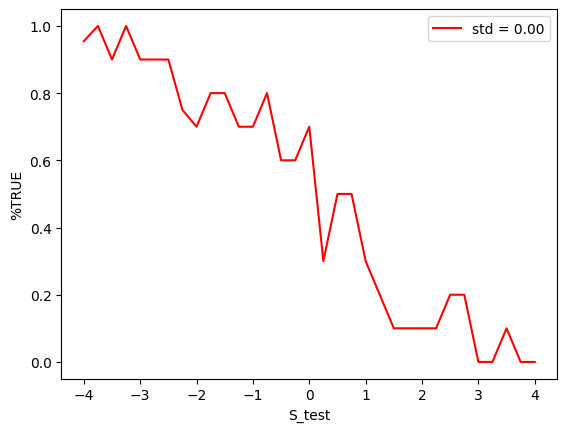

In [ ]:
for i in range(len(stds)):
    print(len(stds))
    sns.lineplot(x=stimulus_2_mean, y=decision_prob[i,0], label=f'std = {stds[i]:.2f}', color= 'red') #discrete_palette[i])
plt.legend()
plt.xlabel("S_test")
plt.ylabel("%TRUE")
#plt.ylim(0, 1)

plt.show()

In [ ]:
print(stimulus_2_mean) 
print(decision_prob[0][0])

[-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.  ]
[0.9  1.   0.9  1.   0.9  0.9  0.9  0.75 0.7  0.8  0.8  0.7  0.7  0.8
 0.6  0.6  0.7  0.3  0.5  0.5  0.3  0.2  0.1  0.1  0.1  0.1  0.2  0.2
 0.   0.   0.1  0.   0.  ]


## TEST plusieurs fichiers 

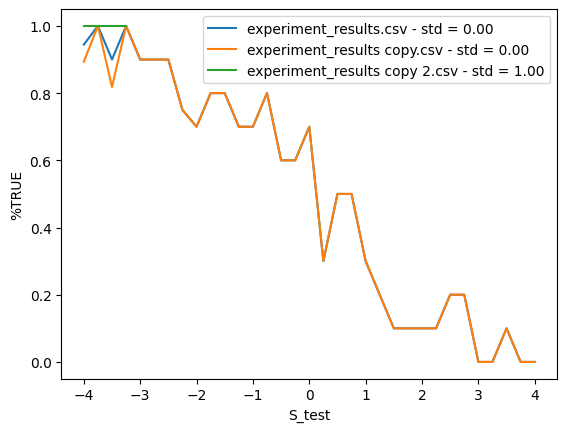

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_prob_from_one_value_pair(results, std, mean):
    mean_results = results[results['Stimulus 1 Value'] == mean]
    std_results = mean_results[mean_results['Stimulus 1 Std'] == std]
    decision = std_results['Comparison Result']
    trial_count_with_same_std = len(std_results)
    return np.sum(decision) / trial_count_with_same_std if trial_count_with_same_std > 0 else np.nan

def process_multiple_files(file_paths):
    
    all_decision_probs = {}

    for file_path in file_paths:
        
        results = pd.read_csv(file_path)
        
       
        means = results['Stimulus 1 Value'].unique()
        stds = results['Stimulus 1 Std'].unique()
        stimulus_2_mean = results['Stimulus 2 Value'].unique()
        
        
        decision_prob = np.zeros((len(means), len(stds), len(stimulus_2_mean)))
        
        
        for k, s2_mean in enumerate(stimulus_2_mean):
            for i, mean in enumerate(means):
                for j, std in enumerate(stds):
                    subset_results = results[results['Stimulus 2 Value'] == s2_mean]
                    decision_prob[i, j, k] = get_prob_from_one_value_pair(subset_results, std, mean)
        
     
        all_decision_probs[file_path] = {
            "stimulus_2_mean": stimulus_2_mean,
            "decision_prob": decision_prob,
            "stds": stds,
            "means": means
        }
    
    return all_decision_probs

def plot_CDF(all_decision_probs):
    for file_path, data in all_decision_probs.items():
        stimulus_2_mean = data["stimulus_2_mean"]
        decision_prob = data["decision_prob"]
        stds = data["stds"]

        for i in range(len(stds)):
            sns.lineplot(
                x=stimulus_2_mean,
                y=decision_prob[i, 0],
                label=f'{file_path} - std = {stds[i]:.2f}'
            )
    
    plt.legend()
    plt.xlabel("S_test")
    plt.ylabel("%TRUE")
    plt.show()


file_paths = ["experiment_results.csv", "experiment_results copy.csv","experiment_results copy 2.csv"]  
all_decision_probs = process_multiple_files(file_paths)
plot_CDF(all_decision_probs)


d
